## Gym Dataset implementing into the Recommendation system using K means Clustering

## Part-I [Loading the Dataset]

In [ ]:
# Importing all the libraries required to work with the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing drive from google.colab to mount and select the dataset uploded in the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Loading the dataset as variable named df
df = pd.read_csv('/content/drive/MyDrive/folder_data_test/prediction_model_datasets/megaGymDataset.csv')

In [ ]:
df

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


## Part-II [EDA]

### General Info of the dataset

In [ ]:
# Shape of the dataset
df.shape

(2918, 9)

In [ ]:
# Grasping the insights about missing data
df.isna().sum()

Unnamed: 0       0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

In [ ]:
# Attributes data types in dataset
df.dtypes

Unnamed: 0      int64
Title          object
Desc           object
Type           object
BodyPart       object
Equipment      object
Level          object
Rating        float64
RatingDesc     object
dtype: object

In [ ]:
# unique vales in columns
df.nunique()

Unnamed: 0    2918
Title         2909
Desc          1050
Type             7
BodyPart        17
Equipment       12
Level            3
Rating          72
RatingDesc       1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2918 non-null   int64  
 1   Title       2918 non-null   object 
 2   Desc        1368 non-null   object 
 3   Type        2918 non-null   object 
 4   BodyPart    2918 non-null   object 
 5   Equipment   2886 non-null   object 
 6   Level       2918 non-null   object 
 7   Rating      1031 non-null   float64
 8   RatingDesc  862 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB


In [ ]:
# Central tendency and stastistical insights of overall dataset
df.describe(include='all')

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
count,2918.000000,2918,1368,2918,2918,2886,2918,1031.000000,862
unique,NaN,2909,1050,7,17,12,3,NaN,1
top,NaN,Seated Cable Rows,The barbell back squat is a popular compound m...,Strength,Abdominals,Body Only,Intermediate,NaN,Average
freq,NaN,3,10,2545,662,1078,2446,NaN,862
mean,1458.500000,NaN,NaN,NaN,NaN,NaN,NaN,5.919690,NaN
std,842.498368,NaN,NaN,NaN,NaN,NaN,NaN,3.584607,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,729.250000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
50%,1458.500000,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN
75%,2187.750000,NaN,NaN,NaN,NaN,NaN,NaN,8.700000,NaN


In [ ]:
# Checking duplicates
df.duplicated().sum()

0

### Handeling the missing values in dataset

In [ ]:
# Handeling the missing values
df['Desc'].fillna('Description Unavailable', inplace=True)
df['Equipment'].fillna('Data Unavailable', inplace=True)
df['Rating'].fillna('Unavailable', inplace=True)

In [ ]:
# Droping some unrequired columns
df.drop(columns=['RatingDesc', 'Unnamed: 0'], inplace=True)

In [ ]:
# imputing the Rating Descripting based on the rating values obtained accordingly
def impute_ratingDesc(row):
  if row['Rating'] == 'Unavailable':
    return 'Unavailable'
  elif row['Rating'] == 0.0:
    return 'No Rating'
  elif row['Rating'] <= 4.0:
    return 'Below Average'
  elif row['Rating'] <= 7.0:
    return 'Average'
  else:
    return 'Above Average'

In [ ]:
# Calling the function to impute Rating Description
df['RatingDesc'] = df.apply(lambda row: impute_ratingDesc(row), axis=1)

In [ ]:
df

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,No Rating
1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,Unavailable,Unavailable
2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,Unavailable,Unavailable
3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,Unavailable,Unavailable
4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,Unavailable,Unavailable
...,...,...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Above Average
2914,Lying Close-Grip Barbell Triceps Press To Chin,Description Unavailable,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Above Average
2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,Unavailable,Unavailable
2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,Unavailable,Unavailable


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       2918 non-null   object
 1   Desc        2918 non-null   object
 2   Type        2918 non-null   object
 3   BodyPart    2918 non-null   object
 4   Equipment   2918 non-null   object
 5   Level       2918 non-null   object
 6   Rating      2918 non-null   object
 7   RatingDesc  2918 non-null   object
dtypes: object(8)
memory usage: 182.5+ KB


In [ ]:
# Checking the null counts in the dataset
df.isna().sum()

Title         0
Desc          0
Type          0
BodyPart      0
Equipment     0
Level         0
Rating        0
RatingDesc    0
dtype: int64

In [ ]:
# Re-checking the duplicates in the modified dataset
df.duplicated().sum()

9

In [ ]:
# Dropping the duplicates in modified dataset
df = df.drop_duplicates()
df.duplicated().sum()

0

### Analyzing the dataset with Visualization

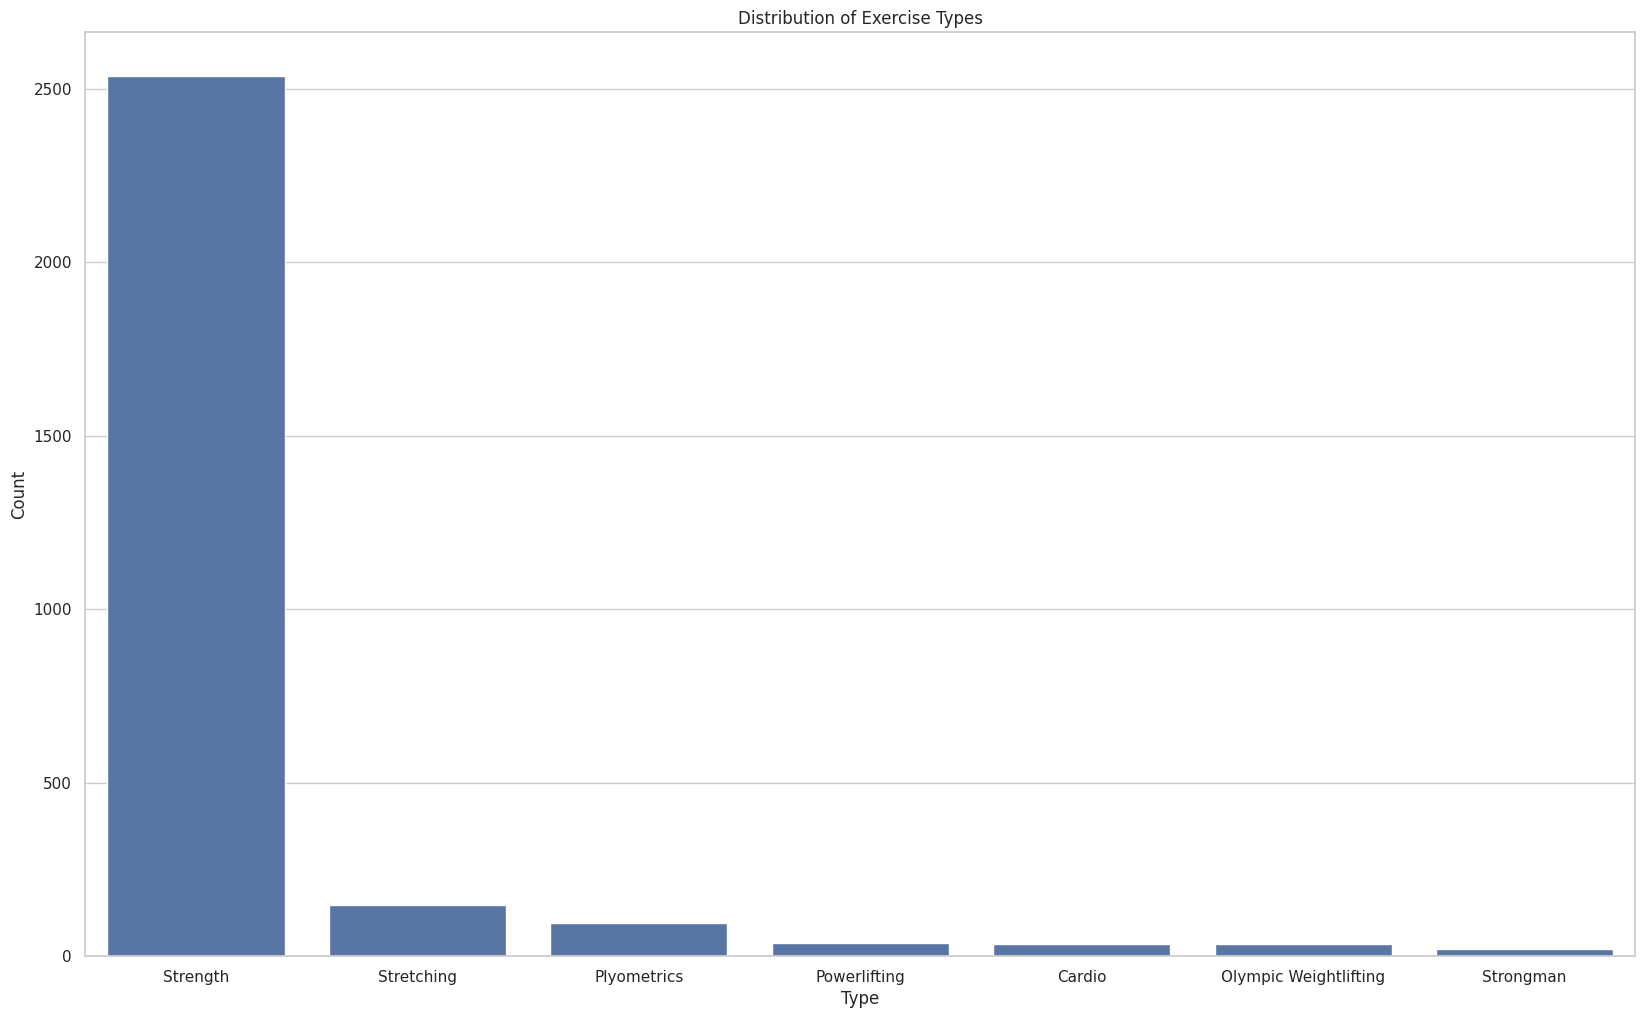

In [ ]:
# Visualizing the dataset with various plots on different columns
sns.set(style='whitegrid')
# Visualization of the dataset for Exercise Types
plt.figure(figsize=(20,12))
sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index)
plt.title('Distribution of Exercise Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

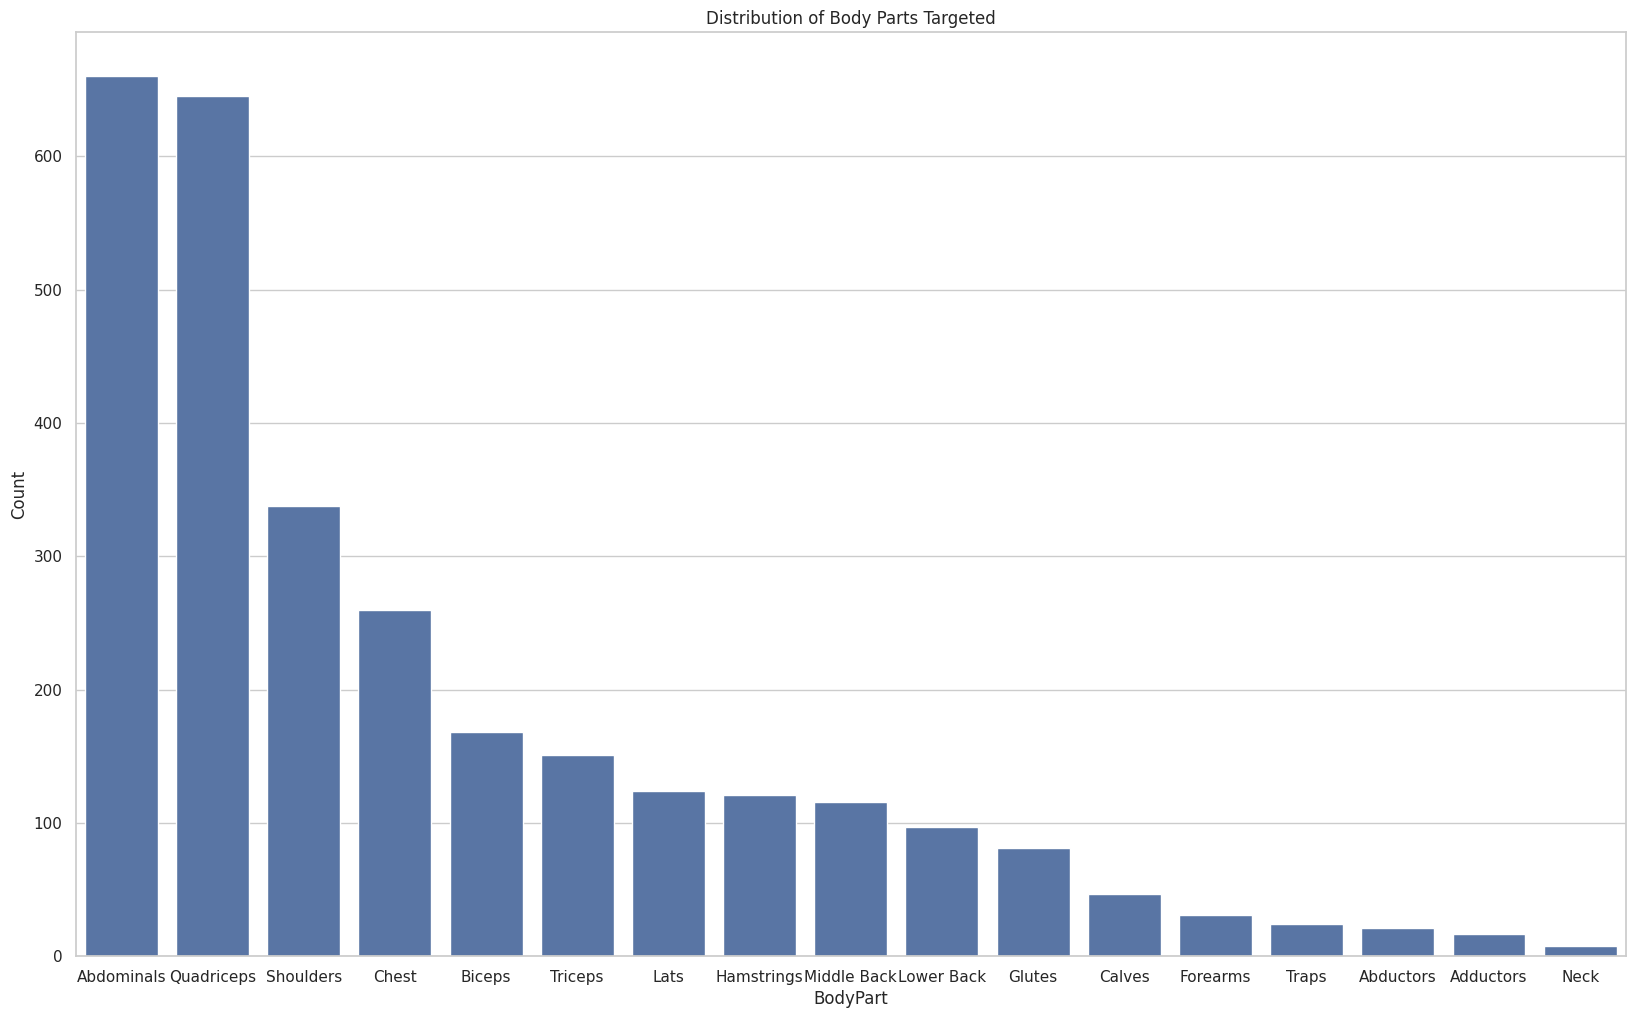

In [ ]:
# Visualization of the dataset for Body Part column

plt.figure(figsize=(20,12))
sns.countplot(data=df, x='BodyPart', order=df['BodyPart'].value_counts().index)
plt.title('Distribution of Body Parts Targeted')
plt.xlabel('BodyPart')
plt.ylabel('Count')
plt.show()

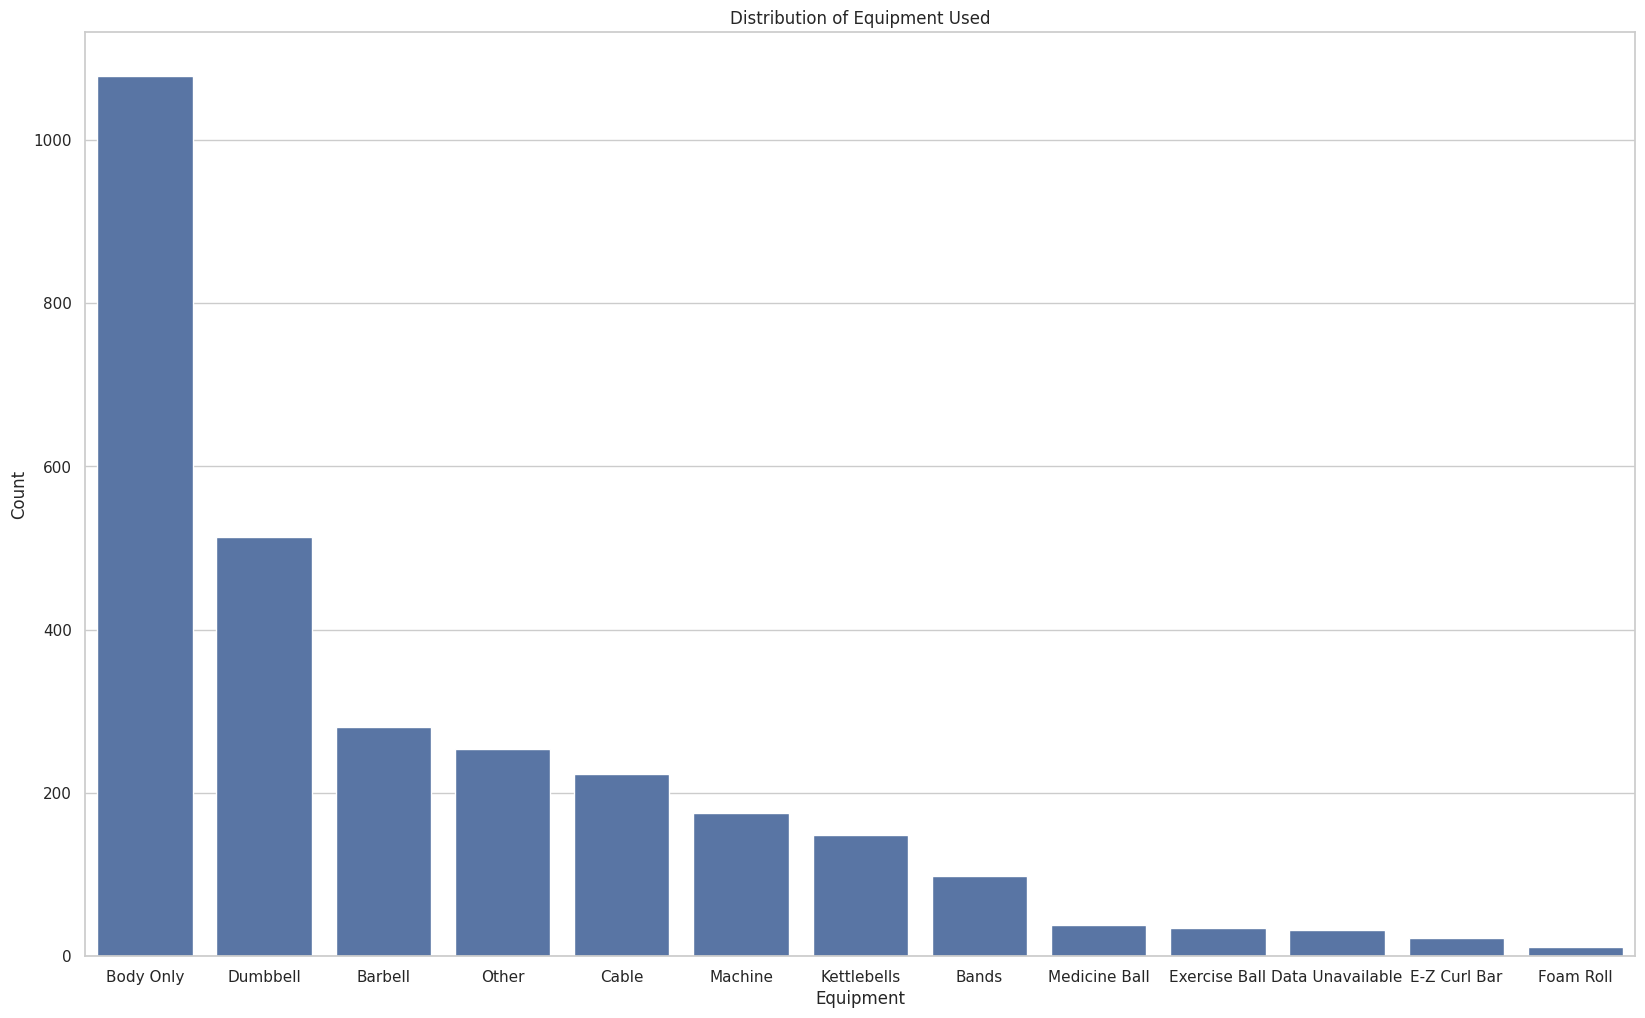

In [ ]:
# Visualization of the dataset for Equipments column

plt.figure(figsize=(20,12))
sns.countplot(data=df, x='Equipment', order=df['Equipment'].value_counts().index)
plt.title('Distribution of Equipment Used')
plt.xlabel('Equipment')
plt.ylabel('Count')
plt.show()

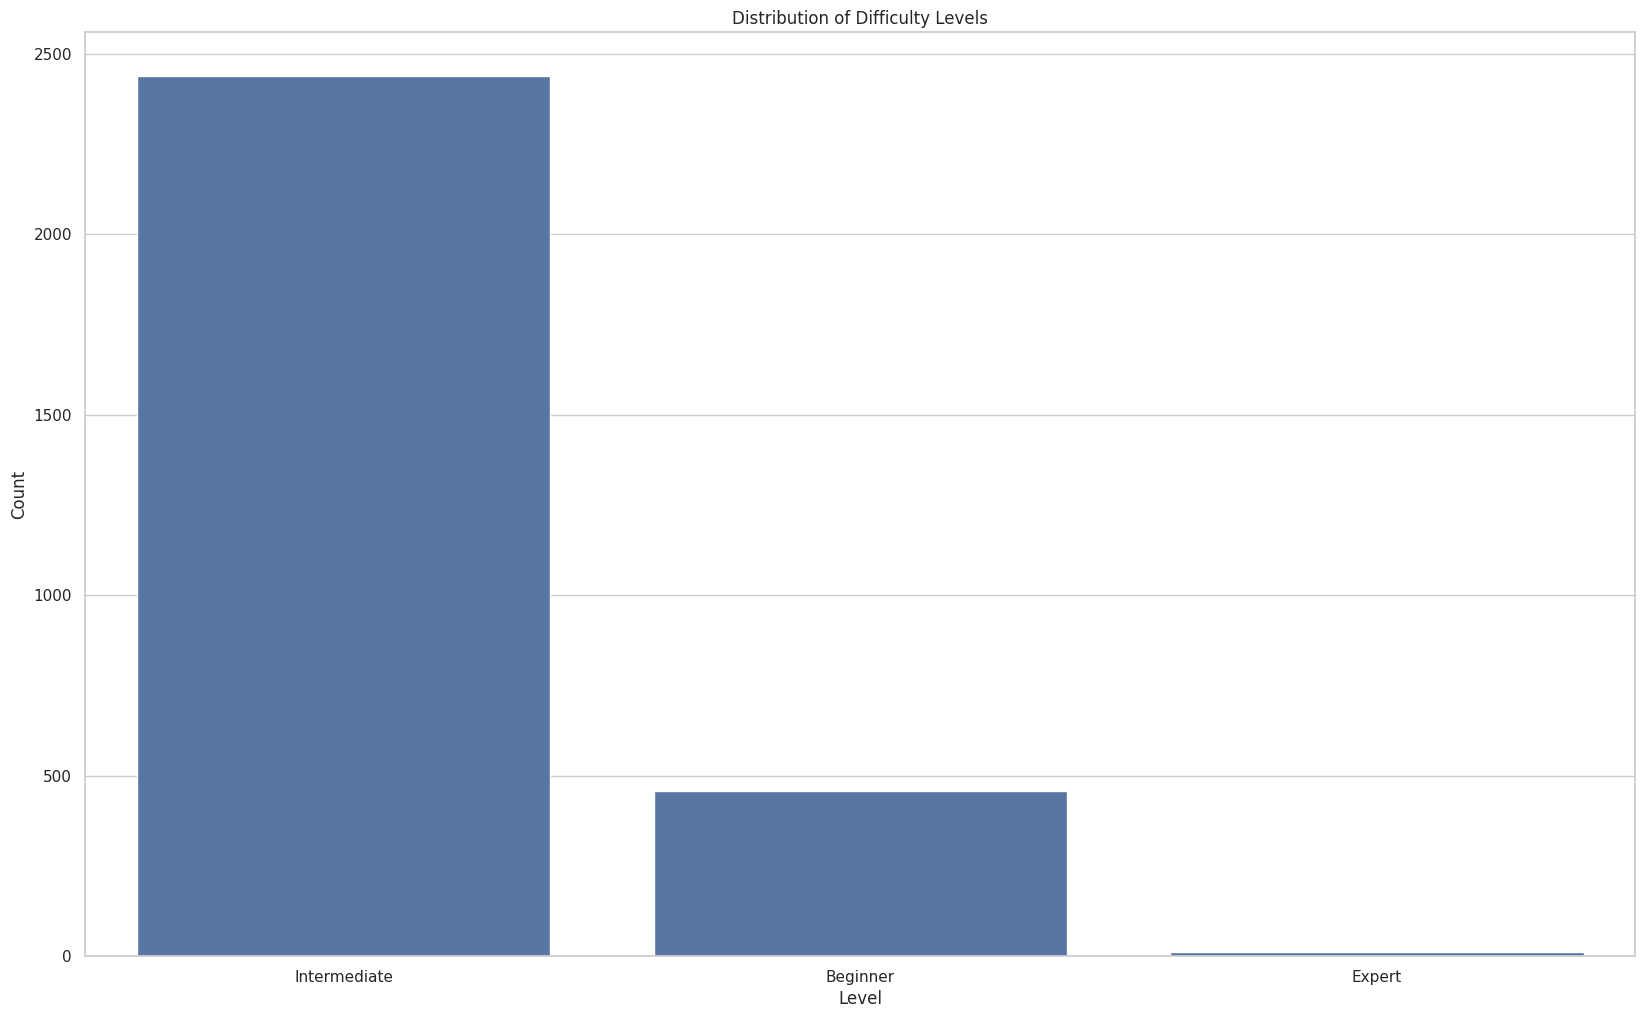

In [ ]:
# Visualization of the dataset based on Exercise Level column

plt.figure(figsize=(20,12))
sns.countplot(data=df, x='Level', order=df['Level'].value_counts().index)
plt.title('Distribution of Difficulty Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

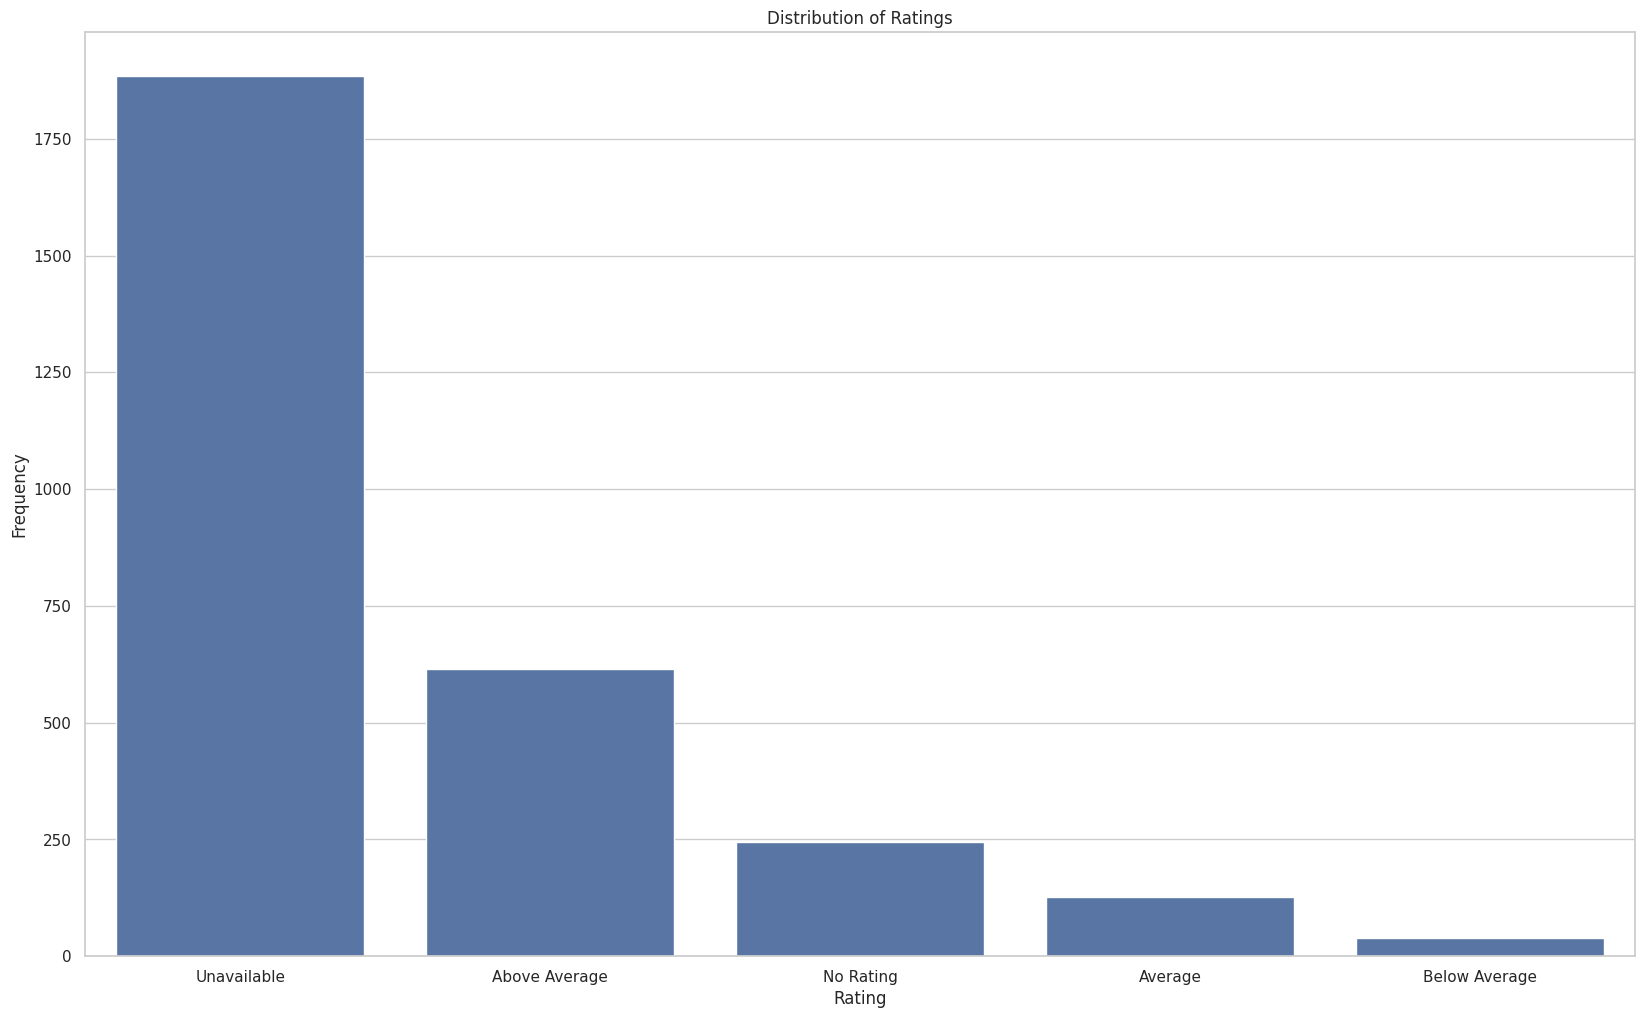

In [ ]:
# Visualization of the dataset based on Rating Description column

plt.figure(figsize=(20,12))
sns.countplot(data=df, x='RatingDesc', order=df['RatingDesc'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,No Rating
1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,Unavailable,Unavailable
2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,Unavailable,Unavailable
3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,Unavailable,Unavailable
4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,Unavailable,Unavailable
...,...,...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Above Average
2914,Lying Close-Grip Barbell Triceps Press To Chin,Description Unavailable,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Above Average
2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,Unavailable,Unavailable
2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,Unavailable,Unavailable


### Finalizing Cleaned Dataset

In [ ]:
# Droping the rating dataset since it Rating Description column can help further
df_2 = df
df_2.drop(columns = ['Rating'], inplace = True)

<ipython-input-29-76ab70a83ffd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop(columns = ['Rating'], inplace = True)


In [ ]:
# Exporting the dataset after cleaning and before working with model
# The dataset is non-encoded
df.to_csv('cleaned_data.csv', index=False)
df

,Title,Desc,Type,BodyPart,Equipment,Level,RatingDesc
0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,No Rating
1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,Unavailable
2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,Unavailable
3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,Unavailable
4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,Unavailable
...,...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,Above Average
2914,Lying Close-Grip Barbell Triceps Press To Chin,Description Unavailable,Strength,Triceps,E-Z Curl Bar,Beginner,Above Average
2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,Unavailable
2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,Unavailable


### Encoding the final dataset

In [ ]:
# Encoding the dataset for further works
from sklearn.preprocessing import LabelEncoder # Importing the label encoder
label_encoder = {}

columns = df_2[['BodyPart', 'Equipment']]

# Encoding the dataset since all columns are object types
for col in columns:
  le = LabelEncoder()
  df_2[col] = le.fit_transform(columns[col])
  label_encoder[col] = le

columns # Checking the encoded dataset

<ipython-input-31-72652c857439>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[col] = le.fit_transform(columns[col])
<ipython-input-31-72652c857439>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[col] = le.fit_transform(columns[col])


,BodyPart,Equipment
0,Abdominals,Bands
1,Abdominals,Bands
2,Abdominals,Bands
3,Abdominals,Bands
4,Abdominals,Bands
...,...,...
2913,Triceps,E-Z Curl Bar
2914,Triceps,E-Z Curl Bar
2915,Triceps,E-Z Curl Bar
2916,Triceps,E-Z Curl Bar


## part-III Building Models

In [ ]:
!pip install kmodes

In [ ]:
# Importing the required funtions from sklearn
from sklearn.preprocessing import StandardScaler
from kmodes.kmodes import KModes

In [ ]:
df

,Title,Desc,Type,BodyPart,Equipment,Level,RatingDesc
0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,0,0,Intermediate,No Rating
1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,0,0,Intermediate,Unavailable
2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,0,0,Intermediate,Unavailable
3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,0,0,Intermediate,Unavailable
4,Crunch,The crunch is a popular core exercise targetin...,Strength,0,0,Intermediate,Unavailable
...,...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,16,6,Intermediate,Above Average
2914,Lying Close-Grip Barbell Triceps Press To Chin,Description Unavailable,Strength,16,6,Beginner,Above Average
2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,16,6,Intermediate,Unavailable
2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,16,6,Intermediate,Unavailable


In [ ]:
# Setring the variable for each with data values
selected_df_main = df[['BodyPart', 'Equipment']]

# Standardizing the main columns
scaler_main = StandardScaler()
scaled_data_main = scaler_main.fit_transform(selected_df_main)

In [ ]:
scaled_data_main

array([[-1.41176514, -1.22943483],
       [-1.41176514, -1.22943483],
       [-1.41176514, -1.22943483],
       ...,
       [ 1.43045108,  0.4442689 ],
       [ 1.43045108,  0.4442689 ],
       [ 1.43045108,  0.4442689 ]])

In [ ]:
# Creating the function to get the wcss values to plot for elbow plot
def elbow_method(X_scaled):
    # Elbow method to find the optimal number of clusters
    wcss = []
    for i in range(1, 11):
        kmodes = KModes(n_clusters=i, init='Cao', max_iter=300, n_init=10, random_state=42)
        kmodes.fit(X_scaled)
        wcss.append(kmodes.cost_)
    return wcss

In [ ]:
# Function to make the elbow plot from values obtained from wcss
def plot_elbow(wcss,point=0):
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#44AA99', markersize=8)
    plt.title('Elbow Method for Optimal Number of Clusters', fontsize=15, fontweight='bold')
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('WCSS', fontsize=12)
    plt.xticks(range(1, 11), fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.7)
    if point != 0:
        plt.axvline(x=point, color='r', linestyle='--')  # Optional: Highlights the elbow point if known

    plt.tight_layout()

In [ ]:
# Making the simple recommendations from the model for records based on certain index
def recommend_items(item_index, data, cluster_col, n_recommendations=5):
    cluster_label = data.loc[item_index, cluster_col]
    cluster_data = data[data[cluster_col] == cluster_label]
    recommended_items = cluster_data.sample(n=n_recommendations).index
    return recommended_items

In [ ]:
# XCreating a function to make the scatter plot to visualize the cluster
def scatter_clusters(y_kmodes,X_scaled,X,val):
    # Plot the clusters
    plt.figure(figsize=(20, 10))
    plt.clf()

    # Define colors for the clusters
    colors = ['y', 'orange', 'b', 'c'] if val == 4 else ['y', 'orange', 'b', 'c','g']

    for i in range(val):
        plt.scatter(X_scaled[y_kmodes == i, 0], X_scaled[y_kmodes == i, 1],
                    s=100, c=colors[i], label=f'Cluster {i+1}')

    # Plotting the centroids
    plt.scatter(kmodes_main_model.cluster_centroids_[:, 0], kmodes_main_model.cluster_centroids_[:, 1],
                s=200, c='red', label='Centroids',marker='x')




    plt.title('Clusters of Customers', fontsize=15, fontweight='bold')
    plt.xlabel(f'{X.columns[0]}', fontsize=12)
    plt.ylabel(f'{X.columns[1]}', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.7)
    plt.tight_layout()

    plt.show()

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d # Importing voronoi functions from scipy to partationize clusters

# Function to plot using voronoi
def plot_kmeans_voronoi(scaled_data, clusters, cluster_centers, feature_names=None):
  plt.figure(figsize=(12, 8))
  sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=clusters, palette='viridis', legend='full')
  centers = kmodes_main_model.cluster_centroids_
  plt.scatter(centers[:, 0], centers[:, 1], s = 300)
  # Plot for seperating line
  vor = Voronoi(centers)
  voronoi_plot_2d(vor, ax = plt.gca(), show_vertices=False, line_colors = 'k', line_width=1)
  plt.title('K-Means Clusters')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.show()

[4080.0, 3267.0, 2971.0, 2598.0, 2413.0, 2223.0, 2152.0, 2074.0, 1986.0, 1927.0]


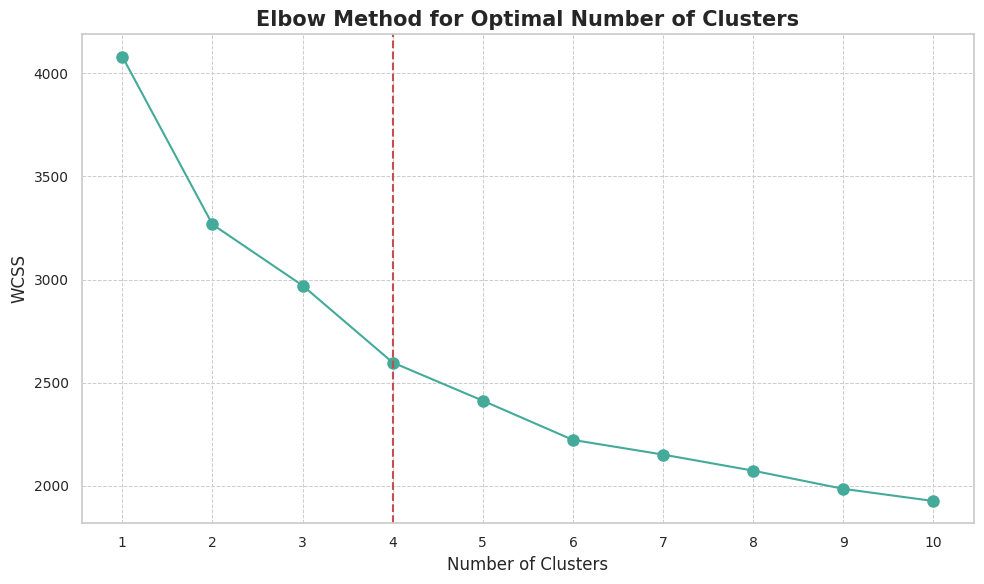

In [ ]:
# Find the WCSS For the Elbow Method for test columns
wcss = elbow_method(scaled_data_main)
print(wcss)
# Plot the Result Of the Elbow Method for test columns
plot_elbow(wcss,3)

In [ ]:
# Kmeans model for the main model
optimal_cluster_no = 3
kmodes_main_model = KModes(n_clusters = optimal_cluster_no, init='Cao', max_iter=300, n_init=10, random_state = 7777)
df['Cluster_main'] = kmodes_main_model.fit_predict(scaled_data_main)

print('Cluster Assignments:')
print(df['Cluster_main'].value_counts())

Cluster Assignments:
Cluster_main
0    1882
1     731
2     296
Name: count, dtype: int64


<ipython-input-43-1503f03287a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_main'] = kmodes_main_model.fit_predict(scaled_data_main)


In [ ]:
# Making the recommendation for index 2 based values
item_index = 2
recommendations = recommend_items(item_index, df, 'Cluster_main', n_recommendations=5)
print(f"Recommendations for item {item_index}: {recommendations}")

Recommendations for item 2: Index([522, 430, 213, 1608, 573], dtype='int64')


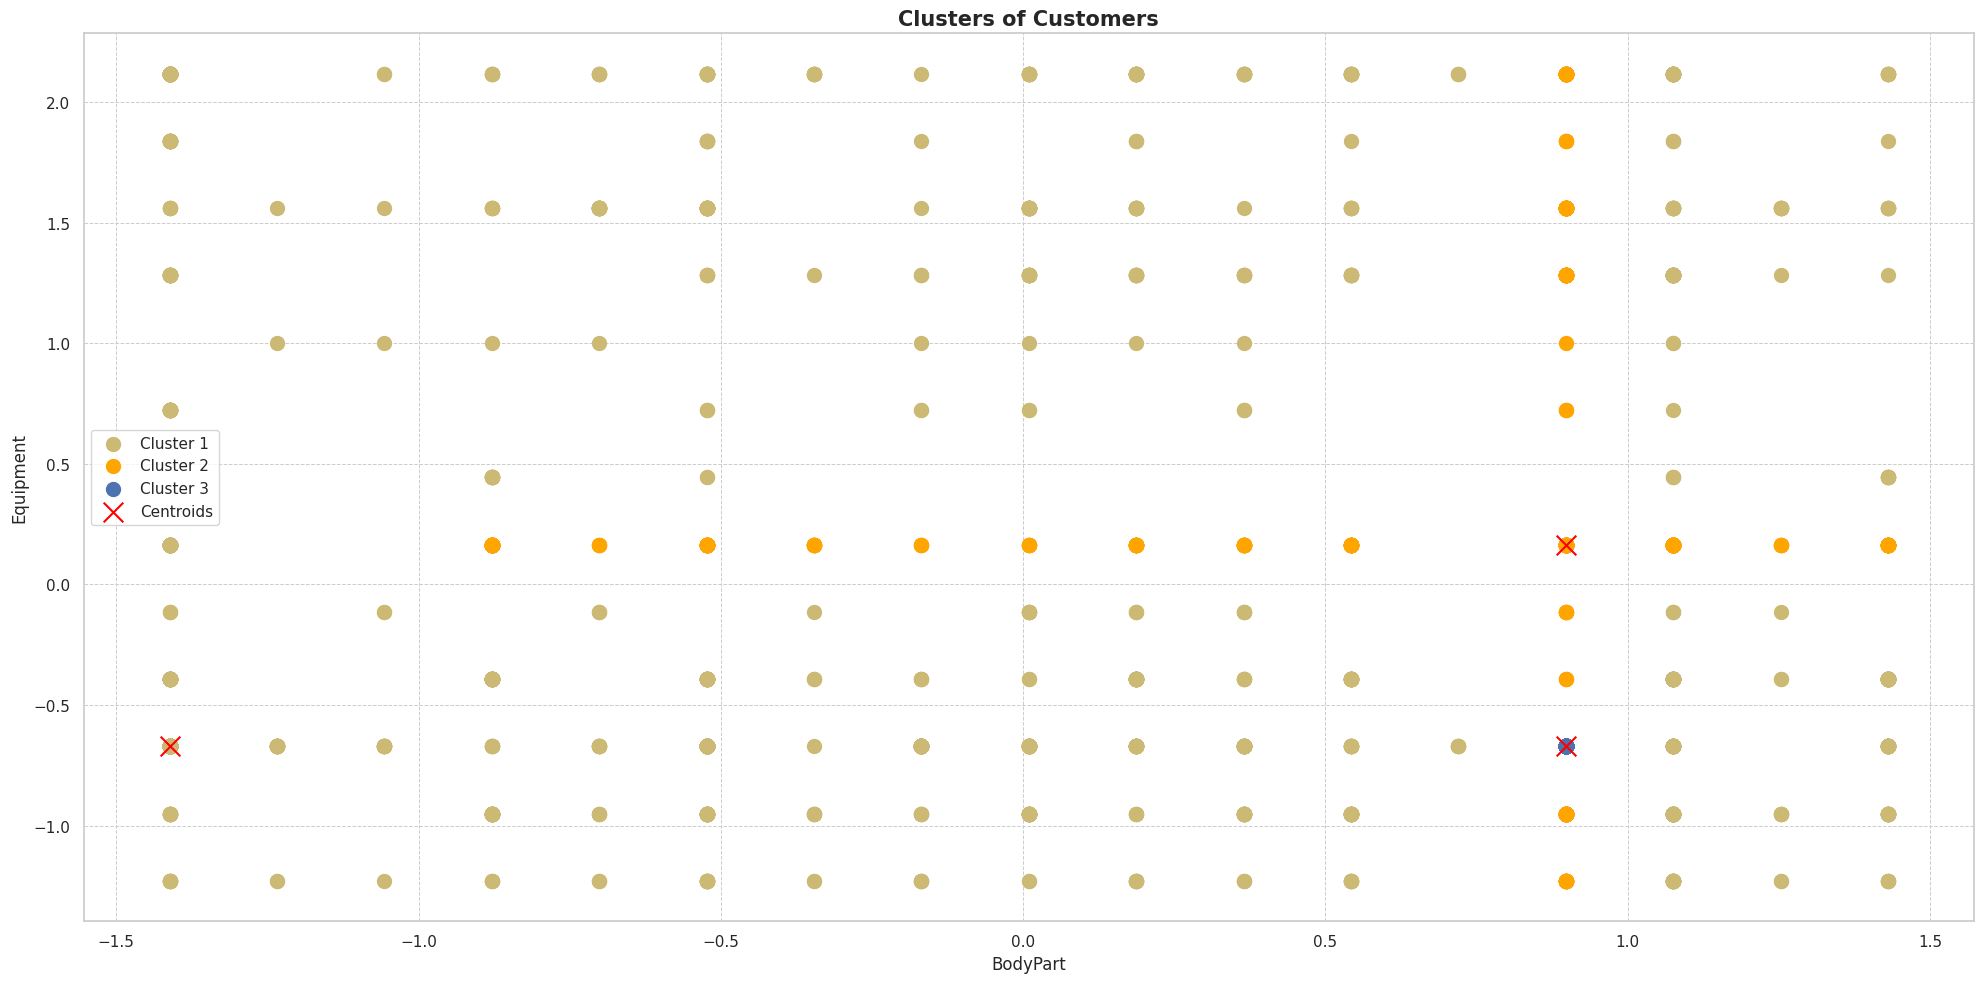

In [ ]:
# Scatter plot for the main selected columns implemented clusters
scatter_clusters(df['Cluster_main'],scaled_data_main,selected_df_main,optimal_cluster_no)

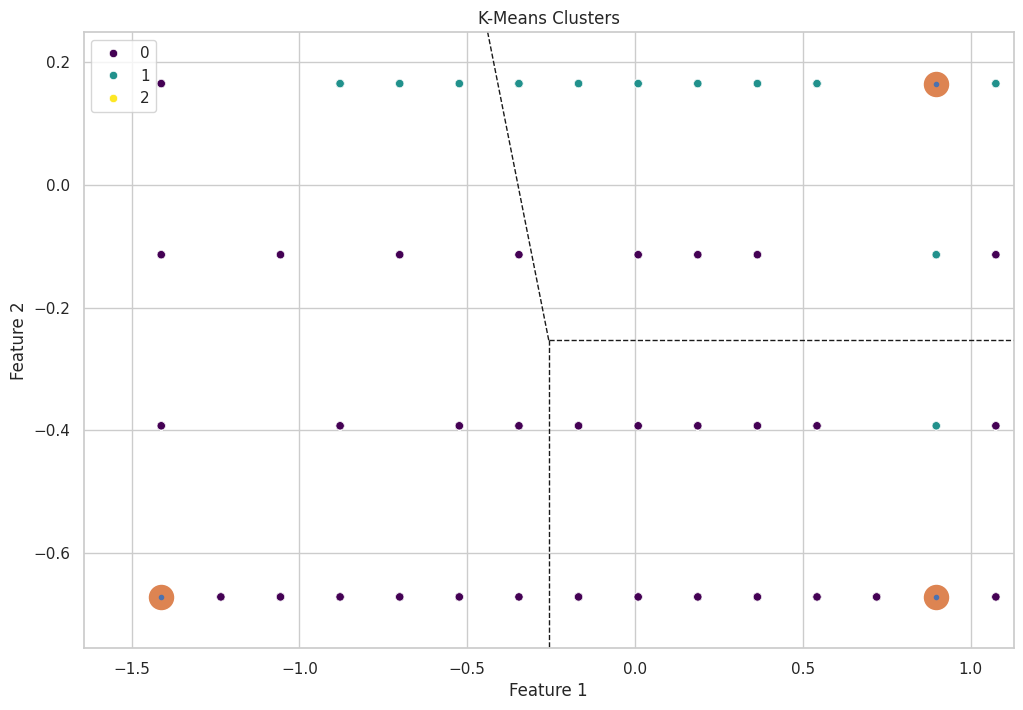

In [ ]:
# Voronoi plot for the obtained model with 4 different features
plot_kmeans_voronoi(scaled_data_main, df['Cluster_main'].values,kmodes_main_model.cluster_centroids_, ['BodyPart', 'Equipment'])

In [ ]:
# Exporting the encoded df
df.to_csv('encoded_csv.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Prepare the data for KNN
# X = df.drop(columns=['Cluster_main'])
X = df[['BodyPart', 'Equipment']]
y = df['Cluster_main']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7777)

# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

# Predict the cluster labels
y_pred = knn.predict(X_test)

# Compute the accuracy of the KNN model
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy}')


KNN Accuracy: 0.9862542955326461


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_items(user_features, df, top_n=10):
    # Create DataFrame for user features
    user_df = pd.DataFrame([user_features])

    # Calculate similarity between user_features and all items
    item_features = df[['BodyPart', 'Equipment']]
    user_feature_array = user_df[['BodyPart', 'Equipment']].values
    item_feature_array = item_features.values

    # Check if item_feature_array has elements
    if item_feature_array.size == 0:
        raise ValueError("Item feature array is empty. Check the input data.")

    similarities = cosine_similarity(user_feature_array, item_feature_array)

    # Check if similarities result in empty array
    if similarities.size == 0:
        raise ValueError("Similarities calculation returned an empty result. Check the input data.")

    # Find the most similar item
    closest_item_index = similarities[0].argmax()
    closest_item = df.iloc[closest_item_index]

    user_cluster = closest_item['Cluster_main']

    # Filter items by cluster
    cluster_items = df[df['Cluster_main'] == user_cluster]

    if cluster_items.empty:
        raise ValueError(f"No items found in the cluster {user_cluster}.")

    # Compute similarity between the user features and the items in the same cluster
    item_features = cluster_items[['BodyPart', 'Equipment']]
    item_feature_array = item_features.values

    # Check if item_feature_array has elements
    if item_feature_array.size == 0:
        raise ValueError("Cluster item feature array is empty. Check the input data.")

    similarities = cosine_similarity(user_feature_array, item_feature_array)

    if similarities.size == 0:
        raise ValueError("Similarities calculation for cluster items returned an empty result.")

    # Get top_n most similar items
    similar_indices = similarities[0].argsort()[-top_n:][::-1]
    recommended_items = cluster_items.iloc[similar_indices]

    return recommended_items.index.tolist()

In [ ]:
def recommend_items_hybrid(user_features, df, top_n):

    user_df = pd.DataFrame([user_features])

    # One-Hot Encoding for categorical features
    item_features = df[['BodyPart', 'Equipment']]
    user_feature_array = user_df[['BodyPart', 'Equipment']].values
    item_feature_array = item_features.values

    # Calculate similarity between user_features and all items
    similarities = cosine_similarity(user_feature_array, item_features)

    # Check for empty similarities
    if similarities.size == 0:
        raise ValueError("Similarities calculation returned an empty result. Check the input data.")

    # Find the most similar item
    closest_item_index = similarities[0].argmax()
    closest_item = df.iloc[closest_item_index]
    user_cluster = closest_item['Cluster_main']

    # Filter items by cluster
    cluster_items = df[df['Cluster_main'] == user_cluster]
    if cluster_items.empty:
        raise ValueError(f"No items found in the cluster {user_cluster}.")

    # Compute similarity between the user features and the items in the same cluster
    item_features_cluster = cluster_items[['BodyPart', 'Equipment']]

    similarities = cosine_similarity(user_feature_array, item_features_cluster)

    if similarities.size == 0:
        raise ValueError("Similarities calculation for cluster items returned an empty result.")

    # Get top_n most similar items
    similar_indices = similarities[0].argsort()[-top_n:][::-1]
    recommended_items = cluster_items.iloc[similar_indices]

    return recommended_items.index.tolist()

In [ ]:
df_encoded = df[['BodyPart', 'Equipment', 'Cluster_main']]

In [ ]:
df

,Title,Desc,Type,BodyPart,Equipment,Level,RatingDesc,Cluster_main
0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,0,0,Intermediate,No Rating,0
1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,0,0,Intermediate,Unavailable,0
2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,0,0,Intermediate,Unavailable,0
3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,0,0,Intermediate,Unavailable,0
4,Crunch,The crunch is a popular core exercise targetin...,Strength,0,0,Intermediate,Unavailable,0
...,...,...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,16,6,Intermediate,Above Average,0
2914,Lying Close-Grip Barbell Triceps Press To Chin,Description Unavailable,Strength,16,6,Beginner,Above Average,0
2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,16,6,Intermediate,Unavailable,0
2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,16,6,Intermediate,Unavailable,0


In [ ]:
attributes_values = {'BodyPart':16, 'Equipment': 6}

recommended_items = recommend_items(attributes_values, df, top_n=10)
print("Recommended items:\n", recommended_items)

Recommended items:
 [2917, 2912, 1346, 1347, 2911, 2916, 2913, 2914, 2915, 1018]


In [ ]:
recommended_items = recommend_items_hybrid(attributes_values, df, top_n=12)
print("Recommended items:\n", recommended_items)

Recommended items:
 [2917, 2912, 1346, 1347, 2911, 2916, 2913, 2914, 2915, 1018, 1026, 1025]


In [ ]:
# Reading the non-encoded dataset
res_df = pd.read_csv('/content/cleaned_data.csv')

In [ ]:
# Reading the values from each index and printing the details of each recommendations made
recommended_items_main = res_df.iloc[recommended_items].to_dict('records')
recommended_items_main

[{'Title': 'Seated One-Arm Dumbbell Palms-Down Wrist Curl',
  'Desc': 'Description Unavailable',
  'Type': 'Strength',
  'BodyPart': 'Forearms',
  'Equipment': 'Dumbbell',
  'Level': 'Beginner',
  'RatingDesc': 'Above Average'},
 {'Title': 'Side plank with dumbbell external rotation',
  'Desc': "The side plank with dumbbell external rotation is a movement that combines an isometric side plank hold with a dumbbell rotation to target both the core and the rotator cuff muscles. You probably won't be able to use much weight without disrupting your balance, but even at light weight, this is a movement that can help address multiple muscle groups in a dynamic warm-up or as accessory work at the end of a workout.",
  'Type': 'Strength',
  'BodyPart': 'Forearms',
  'Equipment': 'Dumbbell',
  'Level': 'Intermediate',
  'RatingDesc': 'Unavailable'},
 {'Title': 'Standing Olympic Plate Hand Squeeze',
  'Desc': 'Description Unavailable',
  'Type': 'Strength',
  'BodyPart': 'Forearms',
  'Equipment'

In [ ]:
# Exporting the model with pickle and integrating in the web app!

**The End!**